## Iris dataset PCA

In this problem, you are going to perform dimension reduction on the Iris dataset. Below there is a short snippet of code that imports this data set and strips off everything we don't want.

This data set measures 150 plants and assigns 4 measurments to each plant. The resulting dataset is a 150x4 matrix where each column represents each "feature" (i.e. sepal length) and each row represents each plant. You are going to perform the following set of steps to perform dimension reduction.

1) Mean center each column. This is always the first step.
2) Compute the SVD and print the four diagonal elements of the diagonal matrix. 
3) The first and second columns of V (which should be 4x1 vectors) are the two most important directions that the SVD found. So extract them into two vectors, lets call them PC1 and PC2.
4) Verify that the length of these two vectors are 1 and that they are perpindicular. That is, they are ortho-normal.
5) Use the dot product to project each 1x4 vector representing each plant onto PC1 and separately onto PC2. This gives you a new 2D coordinate representation for each plant. In the original coordinates, each plant is a 1x4 vector. In this new reduced PCA set of coordinate directions (PC1 and PC2), each plant is a 2D 1x2 vector. (ASIDE, you can use either the dot product or matrix multiplication that behaves like the dot product. There is more than one way way to compute the projections in code.)
6) For each of 150 plants, you now have a 2D coordinate representation of them. Plot a 2D scatter plot.

You have now reduced your data set from 4D to 2D and can visualize it!

In [10]:
Pkg.add("RDatasets")
using RDatasets

   Resolving package versions...


   Installed Mocking ─── v0.7.7
   Installed TZJData ─── v1.1.0+2023d


   Installed RData ───── v0.8.3
   Installed TimeZones ─ v1.13.0


   Installed ExprTools ─ v0.1.10


   Installed RDatasets ─ v0.7.7


    Updating `~/.julia/environments/v1.10/Project.toml`
  [ce6b1742] + RDatasets v0.7.7
    Updating `~/.julia/environments/v1.10/Manifest.toml`
 

 [e2ba6199] + ExprTools v0.1.10
  [78c3b35d] + Mocking v0.7.7
⌅ [df47a6cb] + RData v0.8.3
  [ce6b1742] + RDatasets v0.7.7
  [dc5dba14] + TZJData v1.1.0+2023d
  [f269a46b] + TimeZones v1.13.0
        Info Packages marked with ⌅ have new versions available but compatibility constraints restrict them from upgrading. To see why use `status --outdated -m`


Precompiling 

project...


  ✓ TZJData


  ✓ ExprTools


  ✓ Mocking


  ✓ TimeZones


  ✓ TimeZones → TimeZonesRecipesBaseExt


  ✓ RData


  ✓ RDatasets
  7 dependencies successfully precompiled in 24 seconds. 251 already precompiled.


In [23]:
Pkg.add("StatsAPI")
using StatsAPI
using StatsBase



   Resolving package versions...


  No Changes to `~/.julia/environments/v1.10/Project.toml`


  No Changes to `~/.julia/environments/v1.10/Manifest.toml`


In [21]:
using Pkg
using LinearAlgebra
using Plots
using RDatasets
using Statistics


In [30]:
data

Row,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
,Float64,Float64,Float64,Float64,Cat…
1,-0.743333,0.442667,-2.358,-0.999333,setosa
2,-0.943333,-0.0573333,-2.358,-0.999333,setosa
3,-1.14333,0.142667,-2.458,-0.999333,setosa
4,-1.24333,0.0426667,-2.258,-0.999333,setosa
5,-0.843333,0.542667,-2.358,-0.999333,setosa
6,-0.443333,0.842667,-2.058,-0.799333,setosa
7,-1.24333,0.342667,-2.358,-0.899333,setosa
8,-0.843333,0.342667,-2.258,-0.999333,setosa
9,-1.44333,-0.157333,-2.358,-0.999333,setosa


In [31]:
# Import the iris dataset
data = dataset("datasets","iris")

Row,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
,Float64,Float64,Float64,Float64,Cat…
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa


In [32]:
data_mat = copy(data)
data_mat

Row,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
,Float64,Float64,Float64,Float64,Cat…
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa


In [33]:
data_mat = copy(data)
for col in names(data_mat[:, Not(:Species)])  # Iterate over column names, excluding 'Species'
    data_mat[!, col] .= data_mat[!, col] .- mean(data_mat[!, col])  # Subtract mean of each column from its values
end


In [34]:
data_mat

Row,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
,Float64,Float64,Float64,Float64,Cat…
1,-0.743333,0.442667,-2.358,-0.999333,setosa
2,-0.943333,-0.0573333,-2.358,-0.999333,setosa
3,-1.14333,0.142667,-2.458,-0.999333,setosa
4,-1.24333,0.0426667,-2.258,-0.999333,setosa
5,-0.843333,0.542667,-2.358,-0.999333,setosa
6,-0.443333,0.842667,-2.058,-0.799333,setosa
7,-1.24333,0.342667,-2.358,-0.899333,setosa
8,-0.843333,0.342667,-2.258,-0.999333,setosa
9,-1.44333,-0.157333,-2.358,-0.999333,setosa


In [37]:
data_mat

150×4 Matrix{Float64}:
 -0.743333    0.442667   -2.358  -0.999333
 -0.943333   -0.0573333  -2.358  -0.999333
 -1.14333     0.142667   -2.458  -0.999333
 -1.24333     0.0426667  -2.258  -0.999333
 -0.843333    0.542667   -2.358  -0.999333
 -0.443333    0.842667   -2.058  -0.799333
 -1.24333     0.342667   -2.358  -0.899333
 -0.843333    0.342667   -2.258  -0.999333
 -1.44333    -0.157333   -2.358  -0.999333
 -0.943333    0.0426667  -2.258  -1.09933
  ⋮                              
  1.05667     0.0426667   1.342   1.10067
 -0.0433333  -0.357333    1.342   0.700667
  0.956667    0.142667    2.142   1.10067
  0.856667    0.242667    1.942   1.30067
  0.856667   -0.0573333   1.442   1.10067
  0.456667   -0.557333    1.242   0.700667
  0.656667   -0.0573333   1.442   0.800667
  0.356667    0.342667    1.642   1.10067
  0.0566667  -0.0573333   1.342   0.600667

In [38]:
# Extract just the data rows and turn into a matrix.
data_mat_tmp = Matrix(data[:,1:4])

# Mean center the columns of the data.
# I call the mean-centered data "data_mat"
data_mat=Matrix(data_mat[:, Not(:Species)]) # remove the species column

In [41]:
# Compute the SVD and print the singular values to see how quickly they fall to 0.

U, S, V = svd(data_mat)
println("Singular values:")
println(S)


Singular values:
[25.09996044218387, 6.013147382308734, 3.4136806391921017, 1.8845235082226932]


In [42]:
V

4×4 adjoint(::Matrix{Float64}) with eltype Float64:
  0.361387   -0.656589   0.58203     0.315487
 -0.0845225  -0.730161  -0.597911   -0.319723
  0.856671    0.173373  -0.0762361  -0.479839
  0.358289    0.075481  -0.545831    0.753657

In [7]:
# Each column of V is a "principle direction". The directions are ordered according to their
# importance and the λˢ from the diagonal matrix are a measure of their importances.
# So the first column is the most important direction and 
# the second column is the next most important direction.


4×4 adjoint(::Matrix{Float64}) with eltype Float64:
  0.361387   -0.656589   0.58203     0.315487
 -0.0845225  -0.730161  -0.597911   -0.319723
  0.856671    0.173373  -0.0762361  -0.479839
  0.358289    0.075481  -0.545831    0.753657

In [43]:
# Verify that the length of these two directions are 1. Compute using dot product "dot(vec,vec)"
# Also verify that the two are orthogonal using the dot product.


#  first direction 
first_direction = V[:, 1]
length_first = sqrt(dot(first_direction, first_direction))
println("Length of the first principal direction: ", length_first)

# Verify the length of the second direction (second column of V) is 1
second_direction = V[:, 2]
length_second = sqrt(dot(second_direction, second_direction))
println("Length of the second principal direction: ", length_second)

# Verify that the first and second directions are orthogonal
dot_product = dot(first_direction, second_direction)
println("Dot product of the first and second principal directions: ", dot_product)
# It is very closet to 0, so they are orthogonal.

Length of the first principal direction: 1.0
Length of the second principal direction: 1.0000000000000004
Dot product of the first and second principal directions: -4.926614671774132e-16


In [7]:
# Extract the two most important PCA components. These should be 4x1 vectors / matrices


# Project the data onto PC1 and PC2. Should result in either two 150x1 vectors or one 150x2 matrix 
# depending on how you compute. Either way, you are measuring the projection of each data point onto 
# each of these two directions. The dot product helps with this!


# Plot these. See slides for what you should find :) 

# plot(coordinate1,coordinate2,seriestype = :scatter)
# xlabel!("PC1")
# ylabel!("PC2")

UndefVarError: UndefVarError: `V` not defined

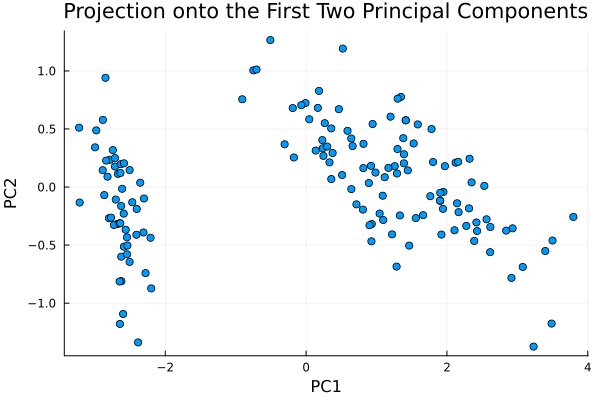

In [45]:
using LinearAlgebra
using Plots

# Perform SVD on the mean-centered data
U, S, V = svd(data_mat)

# Extract the first two principal components (PC1 and PC2 are the first two columns of V)
PC1 = V[:, 1]
PC2 = V[:, 2]

# Project the data onto PC1 and PC2
# The projections are the dot products of the data with each principal component
projection_PC1 = data_mat * PC1
projection_PC2 = data_mat * PC2

# Alternatively, to get both projections at once as a 150x2 matrix, you could use:
projections = data_mat * V[:, 1:2]

# Plot the projections
# If you computed projections as two 150x1 vectors:
plot(projection_PC1, projection_PC2, seriestype = :scatter, legend=false,
     xlabel="PC1", ylabel="PC2", title="Projection onto the First Two Principal Components")

# Or, if you computed projections as a 150x2 matrix:
# plot(projections[:, 1], projections[:, 2], seriestype = :scatter, legend=false,
#      xlabel="PC1", ylabel="PC2", title="Projection onto the First Two Principal Components")
